# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [50]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Files loaded')

Files loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [51]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train =len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

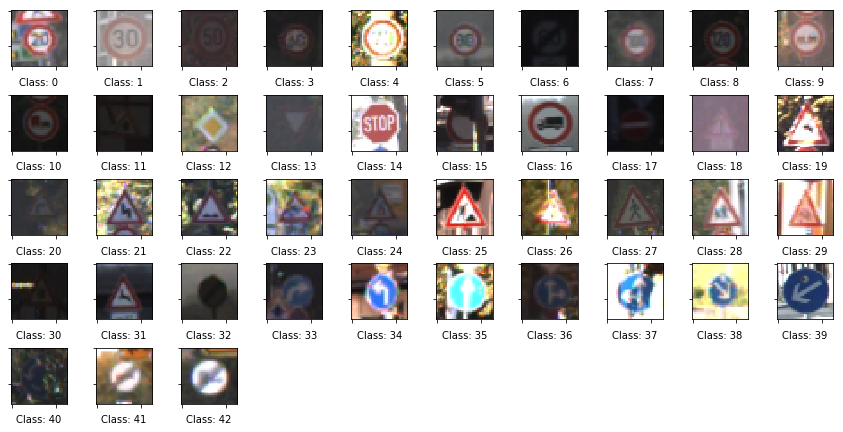

In [52]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# index = random.randint(0, len(X_train))
# image = X_train[index].squeeze()

# plt.figure(figsize=(1,1))
# plt.imshow(image)
# print(y_train[index])

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(n_classes):
    for label in range(len(y_train)):
        if (i == y_train[label]):
            ax = plt.subplot(10, 10, i+1)
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            
            plt.imshow(X_train[label])
            plt.xlabel("Class: {}".format(y_train[label]))
            break
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [53]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [54]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

I shuffled the dataset so the order of the training set doesn't place a bias on our model.


**Split data into training/validation/testing sets**

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Number of training examples =", len(X_train))
print("Number of validation examples =", len(X_validation))
print("Updated Image Shape: {}".format(X_train[0].shape))

Number of training examples = 31367
Number of validation examples = 7842
Updated Image Shape: (32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [56]:
### I used the sklearn's model_selection library to split my training data into train/validation sets. 

### Define your architecture here.
### Feel free to use as many code cells as needed.

In [57]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

**LeNet Architecture**

In [58]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [59]:
# from tensorflow.contrib.layers import flatten
# 3x3 + each convolution is deeper
def LeNetModified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 32x32x64. Output = 16x16x64.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 16x16x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 16x16x16. Output = 8x8x128.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 8x8x128. Output = 8192.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 8192. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(8192, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [60]:
# a copy of the VGG architecture but not as deep as our image is smaller
def VGGLike(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x64.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Layer 2: Convolutional. Input = 32x32x64 Output = 32x32x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Layer 2: Convolutional. Input = 32x32x64 Output = 32x32x64.
    conv2a_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv2a_b = tf.Variable(tf.zeros(64))
    conv2a   = tf.nn.conv2d(conv2, conv2a_W, strides=[1, 1, 1, 1], padding='SAME') + conv2a_b
    
    # SOLUTION: Activation.
    conv2a = tf.nn.relu(conv2a)
   
    
    # SOLUTION: Pooling. Input = 32x32x64. Output = 16x16x64.
    conv2a = tf.nn.avg_pool(conv2a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    
    # SOLUTION: Layer 3: Convolutional. Input = 16x16x64. Output = 16x16x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(conv2a, conv3_W, strides=[1,1,1,1], padding='SAME') + conv3_b
    
    # Activation
    conv3 = tf.nn.relu(conv3)
    
    # SOLUTION: Layer 4: Convolutional. Input = 16x16x128. Output = 16x16x128.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(128))
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1,1,1,1], padding='SAME') + conv4_b
    
    # Activation
    conv4 = tf.nn.relu(conv4)
    
    # SOLUTION: Layer 5: Convolutional. Input = 16x16x128. Output = 16x16x128.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5 = tf.nn.conv2d(conv4, conv5_W, strides=[1,1,1,1], padding='SAME') + conv5_b
    
    # Activation
    conv5 = tf.nn.relu(conv5)
    
    # SOLUTION: Pooling. Input = 16x16x128. Output = 8x8x128.
    conv5 = tf.nn.avg_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    
    
    
    # SOLUTION: Flatten. Input = 8x8x128. Output = 8192.
    fc0   = flatten(conv5)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 8192. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(8192, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

**Features and Labels**

In [61]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

**Training Pipeline**

Create a training pipeline that uses the model to classify MNIST data.

In [62]:
rate = 0.001

logits = LeNetModified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

**Model Evaluation**

In [63]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [64]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [65]:


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}: Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

# tf.reset_default_graph()

Training...

EPOCH 1: Validation Accuracy = 0.431
EPOCH 2: Validation Accuracy = 0.672
EPOCH 3: Validation Accuracy = 0.846
EPOCH 4: Validation Accuracy = 0.915
EPOCH 5: Validation Accuracy = 0.952
EPOCH 6: Validation Accuracy = 0.950
EPOCH 7: Validation Accuracy = 0.964
EPOCH 8: Validation Accuracy = 0.967
EPOCH 9: Validation Accuracy = 0.970
EPOCH 10: Validation Accuracy = 0.921
EPOCH 11: Validation Accuracy = 0.967
EPOCH 12: Validation Accuracy = 0.972
EPOCH 13: Validation Accuracy = 0.967
EPOCH 14: Validation Accuracy = 0.964
EPOCH 15: Validation Accuracy = 0.951
EPOCH 16: Validation Accuracy = 0.979
EPOCH 17: Validation Accuracy = 0.981
EPOCH 18: Validation Accuracy = 0.977
EPOCH 19: Validation Accuracy = 0.978
EPOCH 20: Validation Accuracy = 0.970
Model saved


In [17]:
# Just some cell for convenience
# used to run all cells above
import numpy as np
result_average = np.array([0.977, 0.965, 0.986, 0.966, 0.967]).mean()
print(result_average)

0.9722


## LeNet Architecture & Results
X = (32,32,3)

#### X -> conv1 (relu + max pool) -> conv2 (relu + max pool) -> fc1 -> fc2 -> fc3
**conv1** = conv2d(filter=(5, 5, 3, 6), strides=[1,1,1,1], padding='VALID') -> relu -> max_pool (ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])  
(32,32,3) -> (28,28,6) -> (14,14,6)  
**conv2** = conv2d(filter=(5, 5, 6, 16), strides=[1,1,1,1], padding='VALID') -> relu -> max_pool (ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])  
(14,14,6) -> (10x10x16) -> (5x5x16)  
**fc1** = FullyConnected f=XW+b (400,120) -> relu  
5x5x16 -> flat 400 -> 120  
**fc2** = FullyConnected f=XW+b (120,84) -> relu  
120 -> 84  
**fc3** = FullyConnected f=XW+b (84,43) -> relu  
84 -> 43  

EPOCHS = 10 & BATCH_SIZE = 128  
result_average = np.array([0.950, 0.957, 0.960, 0.940, 0.936]).mean() = 0.9486

EPOCHS = 20 & BATCH_SIZE = 128  
result_average = np.array([0.961, 0.960, 0.978, 0.951, 0.966]).mean() = **0.9632**

EPOCHS = 10 & BATCH_SIZE = 256  
result_average = np.array([0.947, 0.955, 0.948, 0.949, 0.950]).mean() = 0.9498

EPOCHS = 10 & BATCH_SIZE = 64  
result_average = np.array([0.942, 0.953, 0.956, 0.952, 0.963]).mean() = 0.9532

**Observation**
Having more Epochs makes a bigger difference than having a bigger batch size. Reducing batch size also seems to have a slight positive impact.

#### Modified LeNet (no pooling, SAME padding)
#### X -> conv1 (relu + max pool) -> conv2 (relu + max pool) -> fc1 -> fc2 -> fc3
**conv1** = conv2d(filter=(5, 5, 3, 6), strides=[1,1,1,1], padding='SAME') -> relu  
(32,32,3) -> (32,32,3)  
**conv2** = conv2d(filter=(5, 5, 6, 16), strides=[1,1,1,1], padding='SAME') -> relu  
(32,32,3) -> (32,32,3)  
**fc1** = FullyConnected f=XW+b (3072,1200) -> relu  
(32,32,3) -> flat 3072 -> 1200  
**fc2** = FullyConnected f=XW+b (1200,512) -> relu  
1200 -> 512  
**fc3** = FullyConnected f=XW+b (512,43) -> relu  
512 -> 43

**Observation** removing pooling from LeNet puts accuracy at 0.05, that's a terrible result


#### Changing to SAME padding which results in different FC sizes  
SOLUTION: Layer 3: Fully Connected. Input = 1024. Output = 512.  
SOLUTION: Layer 4: Fully Connected. Input = 512. Output = 256.  
SOLUTION: Layer 5: Fully Connected. Input = 256. Output = 43.  
performance degrades to 92'is after 10 epochs  

Removing the Fully Connected Layer 2 reduced performance by a few %  
Subsequently modifying the filter to be 3x3 didn't seem to affect the result_average = np.array([0.965, 0.944, 0.936, 0.938, 0.943]).mean() =  0.9452  

Modifying convolution layers to be 64 -> 128 similar to VGG's fibre levels shows an interesting behavior, the model steadily gains but if it started off bad (e.g. 0.17) after first epoch it can take much longer to climb up. Almost as if it got stuck at a local minimum.  
result_average = np.array([0.5, 0.917, 0.951, 0.905, 0.364]).mean() = 0.7274

On top of the deeper fibres changing max_pool to avg_pool seem to have a positive effect, it seem to climb up faster even in situations that looked like it was gonna get stuck at a local minimum like above.  
result_average = np.array([0.974, 0.968, 0.675, 0.964, 0.923]).mean()

On top of this a comparison with Original LeNet at 50 Epochs shows a much better end result. The original LeNet tend to hover below 97% while the deeper fibre conv with avg_pool will tease 98-99%

#### Testing LeNet with avg_pooling instead of max_pooling
This seem to have an immediate impact. 
result_average = np.array([0.978, 0.967, 0.967, 0.977, 0.961]).mean() = 0.97




## VGG 'like' Architecture & Results
X = (32,32,3)

#### X -> conv1 (relu) -> conv2 (relu + avg pool) -> conv3 (relu) -> conv4 -> (relu + avg_pool) -> fc1 -> fc2 -> fc3
**conv1** = conv2d(filter=(3, 3, 3, 64), strides=[1,1,1,1], padding='SAME') -> relu 
(32x32x3) -> (32x32x64)
**conv2** = conv2d(filter=(3, 3, 64, 64), strides=[1,1,1,1], padding='SAME') -> relu -> max_pool (ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])  
(32x32x64) -> (32x32x64) -> (16x16x64)  
**conv3** = conv2d(filter=(3, 3, 64, 128), strides=[1,1,1,1], padding='SAME') -> relu 
(16x16x64) -> (16x16x128)
**conv4** = conv2d(filter=(3, 3, 128, 128), strides=[1,1,1,1], padding='SAME') -> relu 
(16x16x128) -> (16x16x128) -> (8x8x128)


**fc1** = FullyConnected f=XW+b (8192,1024) -> relu  
8x8x128 -> flat 8192 -> 1024  
**fc2** = FullyConnected f=XW+b (1024,128) -> relu  
1024 -> 128  
**fc3** = FullyConnected f=XW+b (128,43) -> relu  
128 -> 43  
result_average = np.array([0.977, 0.965, 0.986, 0.966, 0.967]).mean() = 0.9722


Using the above with an extra fifth convolution layer and below hyper parameters   
EPOCHS = 50  
BATCH_SIZE = 128  
rate = 0.0005  
achieves "EPOCH 50: Validation Accuracy = 0.992"  






In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.940


In [ ]:
# loader = tf.train.Saver()
# file = 'trained_model.ckpt.meta'

# print('Testing...')
# with tf.Session() as sess:
# #     loader = tf.train.import_meta_graph(file)
# #     loader.restore(sess, tf.train.latest_checkpoint('.'))
    
#     test_accuracy = []
#     for (k, batch_X, batch_y) in batches(X_test, y_test, batch_size):
#         t_accuracy = sess.run(accuracy_operation, feed_dict={x: batch_X, y: batch_y, keep_prob: 1.0})
#         test_accuracy.append(t_accuracy)
#     test_accuracy = np.mean(test_accuracy)

#     print("Test Accuracy = {:.3f}".format(test_accuracy))


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Type of Optimizer: AdamOptimizer
Epochs: 50
Batch Size: 128
Learning Rate: 0.0005

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Definitely a process of trial and error and observing impact as I modified variables. My experiments and observations are recorded above in cells within the Question 3 section. 

1. I first observed the LeNet and just playing with the Epochs and Batch sizes and recorded the impacts. 
2. Tried modifying padding parameters which didn't seem to have a huge impact
3. Tried removing pooling and that produced really poor results
4. Increasing depth of individual convolution layers (fibres) seem to have a positive impact
5. changing to avg_pooling from max_pooling has positive impact on performance
6. Simply changing the learning rate and increasing the epoch of the original LeNet doesn't seem to have a significant impact
7. Modifying the LeNet to have deeper convolution layers, 64 & 128 respectively, has a significant impact on the performance. 
8. Building a series of convolution layers similar to the architecture of VGG shows positive output, however training time slows down significantly
9. Deeper networks with Deeper convolution layers seem to produce better results

My observations aligns with the paper by Zeiler and Fergus, where deeper layers will gradually pick up on higher features of a recognized image. I ended up with the 3 conv layers -> avg_pool -> 3 conv layers architecture. 






---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Image type:  <class 'numpy.ndarray'>  with dimensions:  (8, 32, 32, 3)


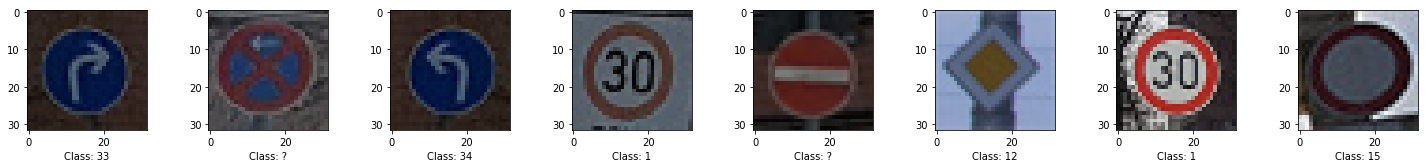

In [66]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc as misc
%matplotlib inline

images = np.asarray([mpimg.imread('./TrafficSignsRuDe/Germany/' + name) for name in os.listdir('./TrafficSignsRuDe/Germany/')])

#resize if not the right size
for index, img in enumerate(images):
    if img.shape[0] != 32 or img.shape[1] != 32:
        images[index] = misc.imresize(img, (32,32))

# for img in images:
#     print(img.shape)
        
images = np.stack(images)

print("Image type: ", type(images), " with dimensions: ", images.shape)

image_label = [33, '?', 34, 1, '?', 12, 1, 15]
fig = plt.figure(figsize=(32,32))
fig.subplots_adjust(hspace=.5)
for i, img in enumerate(images):
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(img)
    plt.xlabel("Class: {}".format(image_label[i]))

plt.show()




In [55]:
# from IPython.display import Image, HTML, display
# from glob import glob
# imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
#                  for s in sorted(glob('./TrafficSignsRuDe/Germany/*.jpg')) ])
# display(HTML(imagesList))

In [126]:
# [33, ?, 34, 1, ?, 12, 1, 15]

prediction = tf.nn.softmax(logits)
# test_prediction = tf.argmax(new_logits, 1)
top5 = tf.nn.top_k(new_logits, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
#     sess.run(tf.global_variables_initializer())
    top5_prediction = sess.run([prediction, top5], feed_dict={x: images});
#     top5_prediction = sess.run(top5, feed_dict={x: images});
#     print(new_prediction)
    print(top5_prediction)

    

[array([[  0.00000000e+00,   0.00000000e+00,   2.45656313e-27,
          2.57655659e-36,   1.05145182e-28,   3.00171928e-24,
          1.68970199e-21,   1.53745580e-32,   2.56183500e-29,
          3.12409591e-30,   7.51178256e-28,   5.82561737e-21,
          2.50399597e-24,   2.07966037e-22,   2.96189635e-32,
          0.00000000e+00,   2.04610404e-17,   6.76547123e-28,
          0.00000000e+00,   0.00000000e+00,   6.42925488e-38,
          6.07909372e-37,   0.00000000e+00,   2.05664010e-29,
          0.00000000e+00,   3.97163007e-31,   3.51971346e-25,
          2.91170479e-34,   5.14986019e-37,   0.00000000e+00,
          1.40179923e-31,   1.58829636e-37,   9.11941745e-25,
          1.00000000e+00,   1.82240291e-13,   5.51216517e-10,
          6.30452493e-28,   2.65006567e-19,   2.00858075e-25,
          2.79176313e-13,   1.86352552e-24,   0.00000000e+00,
          1.61011622e-31],
       [  1.57681852e-18,   5.43306922e-14,   1.87075161e-10,
          5.54714677e-16,   1.46127115e-13

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


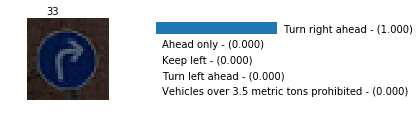

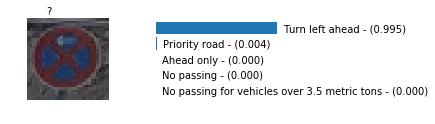

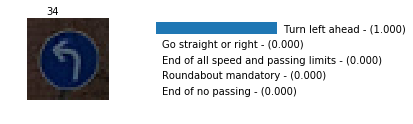

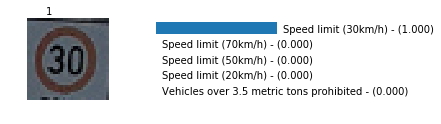

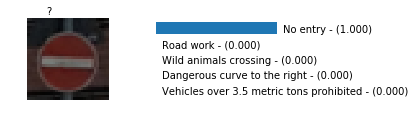

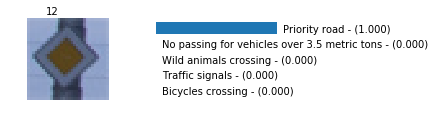

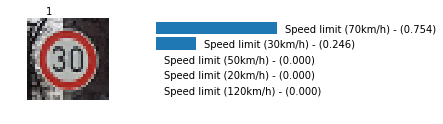

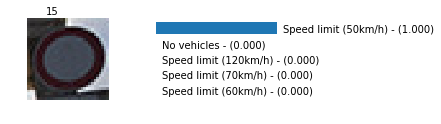

In [133]:
import pandas as pd
import matplotlib.gridspec as gridspec

classes = pd.read_csv('signnames.csv')
signNames = classes['SignName']
my_prediction = top5_prediction[1][0]
my_top5 = top5_prediction[1][1]

# print(top5_prediction)
# print(top5_prediction[0])
# print(top5_prediction[1])
# print(top5_prediction[1][0])


for i in range(len(images)):
    plt.figure(figsize = (5, 1.5))
    grid = gridspec.GridSpec(1, 2)

    plt.subplot(grid[0])
    plt.imshow(images[i])
    plt.text(7, -2, image_label[i]);
    plt.axis('off')
    
    plt.subplot(grid[1])
#     print(my_prediction[i])
#     print(6 - np.arange(5))
    plt.barh(6 - np.arange(5), my_prediction[i], align='center')
    plt.axis('off');
    
    for j in range(5):
        plt.text(my_prediction[i][j] + .05 , 6 - j - .25, signNames[my_top5[i][j]] + str(" - ({:.3f})".format(top5_prediction[1][0][i][j])))
#         print("what", i, "", my_prediction[j])
#         plt.text(my_prediction[j] + .05 , 6 - j - .25, signNames[my_top5[i][j]])

    plt.show();

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.